# stolen firearms in crimes

Source:  https://cdn.muckrock.com/foia_files/2017/05/18/The_Trace-Gun_Log.pdf

This dataset has info about firearms used in crimes, 
found at crime scenes or other incidents, 
booked into property or evidence, seized or confiscated during investigations 
or otherwise recovered or taken in by Florida Department of Law Enforcement.

I used tabula, marked the tables by hand because they weren't in horizontal axis and exported the csv. file

In [1]:
import pandas as pd

import numpy as np

%matplotlib inline

In [19]:
df = pd.read_csv("GUNS.csv", skiprows=1)

In [17]:
df

,Case Number,Booked,Description,Brand/Make Brand/Model,Serial #,Unnamed: 5
0,NaN,Date,NaN,NaN,NaN,NaN
1,1999-,2/3/2016,JH-10A Benelli/HK Super 90 12-,Benelli Super 90,M255784,NaN
2,13507,NaN,gauge shotgun,NaN,NaN,NaN
3,2003-,6/16/2016,DDO-2 US Carbine .30 Cal,Carbine 30,4702537,NaN
4,7201,NaN,NaN,NaN,NaN,NaN
5,2003-,6/16/2016,DDO-1 Marlin .22 cal Rifle,Marlin 40,4702537,NaN
6,7201,NaN,NaN,NaN,NaN,NaN
7,2003-,6/16/2016,DDO-3 Remington Shotgun,Remington unknown,496490,NaN
8,7201,NaN,NaN,NaN,NaN,NaN
9,2004-,5/26/2016,RMM-1; 9mm Hi-Point,Hi-Point C,P214703,NaN


In [5]:
df.dty

Unnamed: 0      object
Unnamed: 1      object
Unnamed: 2      object
Guns By Date    object
Unnamed: 4      object
Unnamed: 5      object
dtype: object

In [30]:
df[df.notnull()]

,Case Number,Booked,Description,Brand/Make Brand/Model,Serial #,Unnamed: 5
0,NaN,Date,NaN,NaN,NaN,NaN
1,1999-,2/3/2016,JH-10A Benelli/HK Super 90 12-,Benelli Super 90,M255784,NaN
2,13507,NaN,gauge shotgun,NaN,NaN,NaN
3,2003-,6/16/2016,DDO-2 US Carbine .30 Cal,Carbine 30,4702537,NaN
4,7201,NaN,NaN,NaN,NaN,NaN
5,2003-,6/16/2016,DDO-1 Marlin .22 cal Rifle,Marlin 40,4702537,NaN
6,7201,NaN,NaN,NaN,NaN,NaN
7,2003-,6/16/2016,DDO-3 Remington Shotgun,Remington unknown,496490,NaN
8,7201,NaN,NaN,NaN,NaN,NaN
9,2004-,5/26/2016,RMM-1; 9mm Hi-Point,Hi-Point C,P214703,NaN


In [33]:
df['Description'] = df['Description'].replace(np.nan, "Not Recorded")

In [63]:
df.Description.str.lower().value_counts().sort_values(ascending = False).head(10)

not recorded                     93
casings for ibis                  9
revolver                          6
for ibis                          5
shotgun                           4
seized from se bedroom in box     4
on floor                          4
pistol.                           4
court order                       4
magazine                          3
Name: Description, dtype: int64

# Where did they hide their guns? (no imagination what so ever)

In [35]:
df_bedroom =  df[df.Description.str.contains(".*bedroom")]

In [39]:
df_bedroom.Description.value_counts()

seized from SE bedroom in box     3
bedroom closet                    2
seized from NE bedroom closet     2
SE bedroom in box on floor        2
from NE bedroom dresser           1
bedroom in box on floor           1
seized from NE bedroom dresser    1
bullets seized from SE bedroom    1
Name: Description, dtype: int64

In [44]:
df_floor =  df[df.Description.str.contains(".*floor")]
df_floor.Description.count().sum()

9

In [45]:
df_magazine =  df[df.Description.str.contains(".*magazine ")]
df_magazine.Description.count().sum()

5

# Most common Brand???

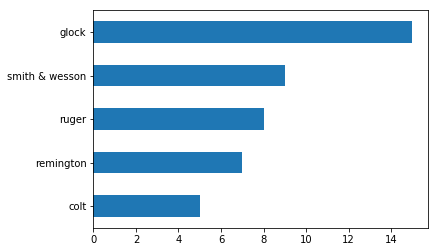

In [62]:
df['Brand/Make Brand/Model'].str.lower().value_counts().head().sort_values(ascending = True).plot(kind='barh')